In [2]:
import numpy as np
from pylab import *
import matplotlib.pyplot as plt

In [192]:
N = np.arange(4, 16)

In [247]:
def newton_coefficient(x, y):
    m = len(x)
    a = np.copy(y)
    for k in range(1, m):
        a[k:] = (a[k:] - a[k - 1]) / (x[k:] - x[k - 1])
    return a

In [283]:
def p_lagrange(n, x, x_n, y_n):
    def l(i, x):
        return np.prod(x * np.ones(i) - x_n[:i]) * np.prod(x * np.ones(n - i) - x_n[i + 1:])
    return sum(np.array([y_n[i] * l(i, x) / l(i, x_n[i]) for i in range(n + 1)]))

In [284]:
def p_newton(n, x, x_n, y_n):
    a = newton_coefficient(x_n, y_n)
    return a[0] + sum([a[k] * np.prod(x * np.ones(k) - x_n[:k]) for k in range(1, n + 1)])

In [285]:
M = 70
x = np.linspace(1., 2., M)
y = np.log(x)
P_n_newton, P_n_lagrange, subtr_lagrange, subtr_newton = [], [], [], []
for n in N:
    x_n = np.array([1 + k / n for k in range(n + 1)])
    y_n = np.log(x_n)
    P_n_lagrange += [array([p_lagrange(n, s, x_n, y_n) for s in x])]
    P_n_newton += [array([p_newton(n, s, x_n, y_n) for s in x])]
    subtr_lagrange += [P_n_lagrange[n - 4] - y]
    subtr_newton += [P_n_newton[n - 4] - y]

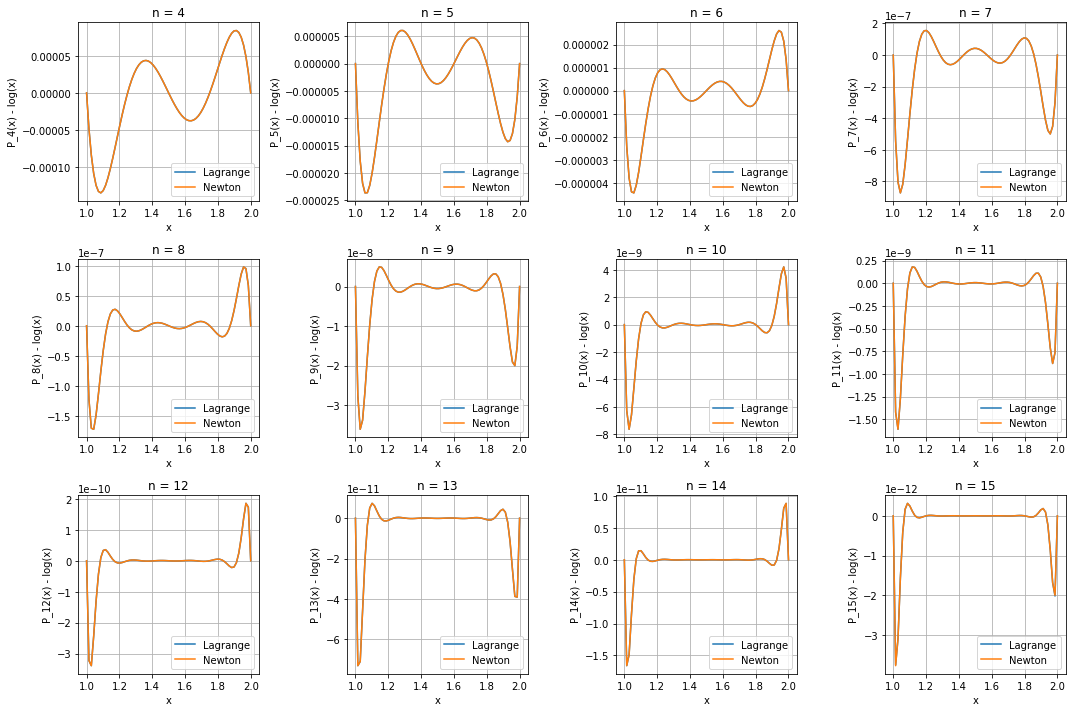

In [286]:
plt.figure(figsize=(15,10))
k = 0
for n in N:
    plt.subplot(3, 4, k + 1)
    plt.plot(x, subtr_lagrange[n - 4], '-', label='Lagrange')
    plt.plot(x, subtr_newton[n - 4], '-', label='Newton')
    plt.xlabel('x')
    plt.ylabel('P_'+str(n)+'(x) - log(x)')
    plt.title('n = '+ str(n))
    plt.legend(loc=4)
    plt.grid()
    k += 1
plt.tight_layout()
plt.show()